<div align="right">

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/wisaaco/TallerPythonFEE/blob/main/lessons/5/5_PandasVisualitzacions.ipynb)


</div>

Tematica?:
- Visualització?
- Nan?
- index.serie temporal
- Geopandas?

# 5 - Visualitzacions

Pandas inclou una gran quantitat d'utilitats per a facilitar la representació gràfica d'un dataframe i de les seves sèries usant la llibreria Matplotlib.
[Veure documentació](https://pandas.pydata.org/docs/user_guide/visualization.html).

La visualització directa amb Pandas és simplement fantàstica, a causa del seu fàcil ús, per a interpretacions i informes varis. Encara que, no és prou versàtil per a controlar diversos "criteris tècnics", en aquest cas cal complementar-la amb matplotlib. Els gràfics de Pandes són una abstracció d'aquesta llibreria.

D'altra banda, veurem alguns exemples de visualització amb una altra llibreria anomenada [Seaborn](https://seaborn.pydata.org/).

Ara com ara, ens limitarem a parlar sobre els tipus bàsics de visualització i dels elements necessaris per facilitar la interpretació ((títols, tics als eixos, llegendes, selecció de colors, etc.)

- Línies
- Barres
- Histogrames i *Boxplots
- Scatter plots
 

## Plot method


In [18]:
import numpy as np
import pandas as pd

# Generació de dades

np.random.seed(1)
samples = 50

df = pd.DataFrame({
    "temperatura":np.random.randint(low=-10,high=50,size=samples),
    "vent":np.random.choice(["N","S","E","W"],size=samples)})

df.head()

,temperatura,vent
0,27,E
1,33,S
2,2,N
3,-2,E
4,-1,W


<AxesSubplot:>

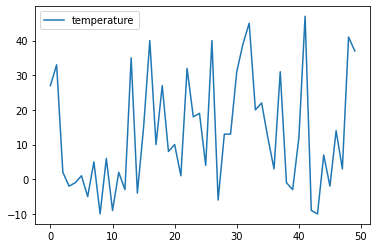

In [3]:
df.plot()

<AxesSubplot:>

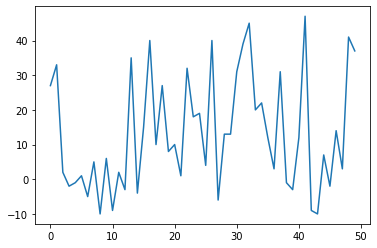

In [4]:
df.temperatura.plot() # Quines difèrencies a les dos gràfiques n'hi ha entre un dataframe i una sèrie?

In [5]:
df.vent.plot()

TypeError: no numeric data to plot

In [10]:
df.groupby(["vent"]).size()

vent
E    11
N    12
S    13
W    14
dtype: int64

<AxesSubplot:xlabel='vent'>

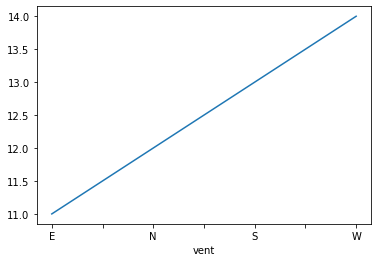

In [11]:
df.groupby(["vent"]).size().plot()

<AxesSubplot:xlabel='vent'>

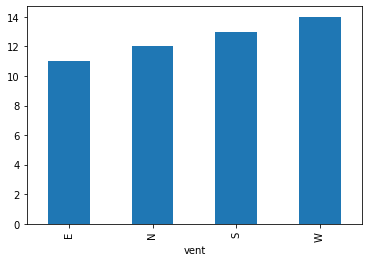

In [12]:
df.groupby(["vent"]).size().plot(kind="bar")

## Matplotlib

Text(0.5, 1.0, 'Temperatura ')

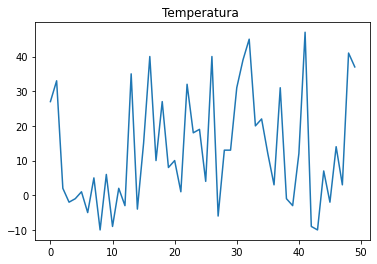

In [21]:
import matplotlib.pyplot as plt # !


plt.plot(df.temperatura)
plt.title("Temperatura ")

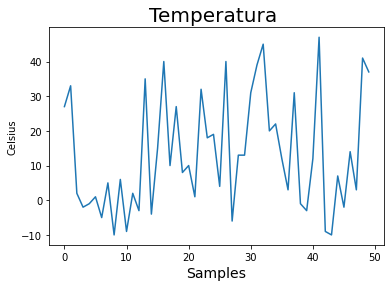

In [30]:
import matplotlib.pyplot as plot

fig, ax = plot.subplots() # Definició forma

ax.plot(df.temperatura) # Insercció de dades

plt.title("Temperatura ", fontsize=20) # Maquetació
plt.xlabel('Samples', fontsize=14)
plt.ylabel('Celsius')


plt.savefig('data/test.jpg',dpi=100) # Visualització i/o guardat
plt.show()

In [37]:
# Vent sèrie
tipusVent  = df.groupby(["vent"]).size()

print(tipusVent)

vent
E    11
N    12
S    13
W    14
dtype: int64


<BarContainer object of 4 artists>

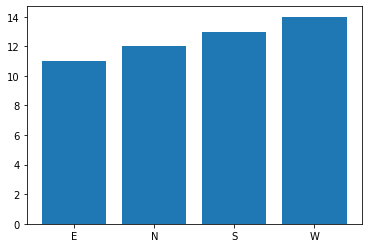

In [38]:

x = tipusVent.index
y = tipusVent.values

fig, ax = plot.subplots() # Definició forma
ax.bar(x,y)

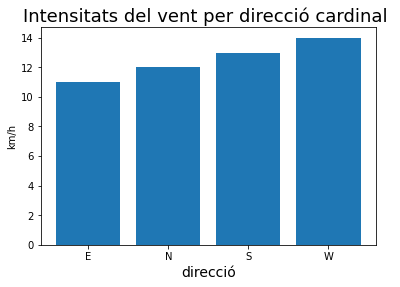

In [43]:
fig, ax = plot.subplots() # Definició forma

ax.bar(x,y) # insercció de dades

plt.title("Intensitats del vent per direcció cardinal ", fontsize=18) # Maquetació
plt.xlabel('direcció', fontsize=14)
plt.ylabel('km/h')


plt.savefig('data/test.jpg',dpi=100) # Visualització i/o guardat
plt.show()


## Quines diferències trobes amb el bar.plot fet amb pandas?

## Tipus de visualitzacions

### Barres

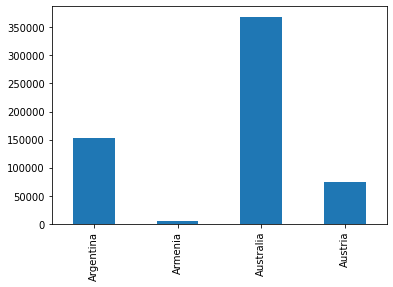

In [45]:
df= pd.read_csv("data/WHO.csv")

co2 = df["Total_CO2_emissions"]
ticks_labels = df["Country"][6:10].values

ax = co2[6:10].plot(kind="bar") # un plot retorna el component AX
ax.set_xticklabels(ticks_labels)
plt.show()

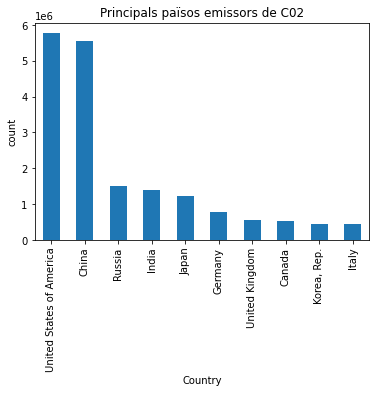

In [48]:
co2 = df["Total_CO2_emissions"].sort_values(ascending=False).head(10) 

dateSelect = df.loc[co2.index] # Noms
co2.index = dateSelect["Country"] 

ax = co2.plot(kind="bar") 
ax.set_ylabel("count")
plt.title("Principals països emissors de C02")
plt.show()


[![License: CC BY 4.0](https://img.shields.io/badge/License-CC_BY_4.0-lightgrey.svg)](https://creativecommons.org/licenses/by/4.0/) <br/>
Isaac Lera and Gabriel Moya <br/>
Universitat de les Illes Balears <br/>
isaac.lera@uib.edu, gabriel.moya@uib.edu